In [2]:
print("Hello this is working")

Hello this is working


In [2]:
import pandas as pd 
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Question: To see if there is any Causal Relationship between the amount of time phone used and obesity

We need to check if being on your phone for longer hours leads to obesity or not. 

In [6]:
data['label'] = data['NObeyesdad'].apply(lambda x : 0 if x == 'Normal_Weight' else 1)

In [8]:
data.drop('NObeyesdad', axis = 1, inplace = True)

In [9]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,label
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,1


In [10]:
data['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [11]:
data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'no': 0, 'yes':1})
data['SCC'] = data['SCC'].map({'no':0,'yes':1})
data['FAVC'] = data['FAVC'].map({'no': 0 , 'yes': 1})
data['SMOKE'] = data['SMOKE'].map({'no': 0 , 'yes': 1})
data['MTRANS'] = data['MTRANS'].map({'Public_Transportation': 0 , 'Walking': 1})
data['CAEC'] = data['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently':2, 'Always': 3})

In [12]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,label
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,no,0.0,0
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,Sometimes,0.0,0
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,Frequently,0.0,0
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,Frequently,1.0,1
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,Sometimes,0.0,1


In [13]:
data['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [14]:
data['CALC'] = data['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently':2, 'Always': 3})

In [17]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,label
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0.0,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0.0,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0.0,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1.0,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0.0,1


In [16]:
data['Gender'] = data['Gender'].map({'Male': 0 , 'Female': 1})

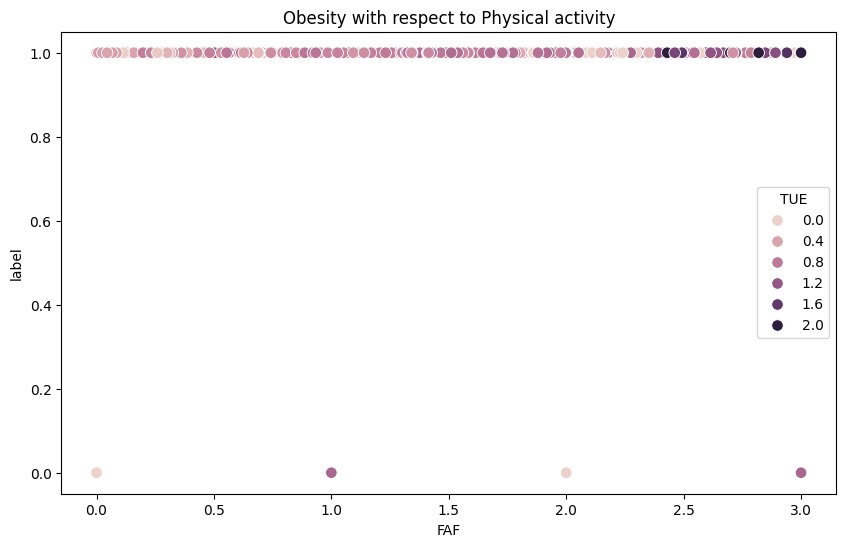

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='FAF', y = 'label', hue = 'TUE',data = data,s = 70).set_title('Obesity with respect to Physical activity')
plt.show()

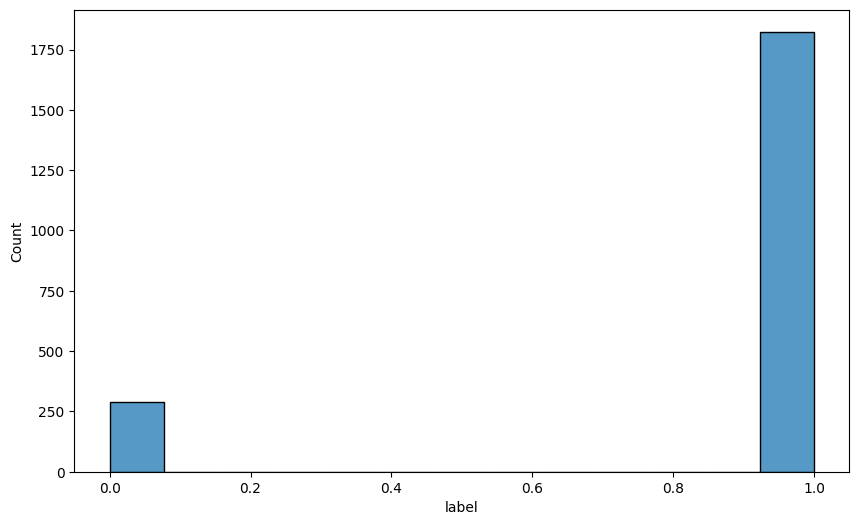

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data = data['label'])
plt.show()

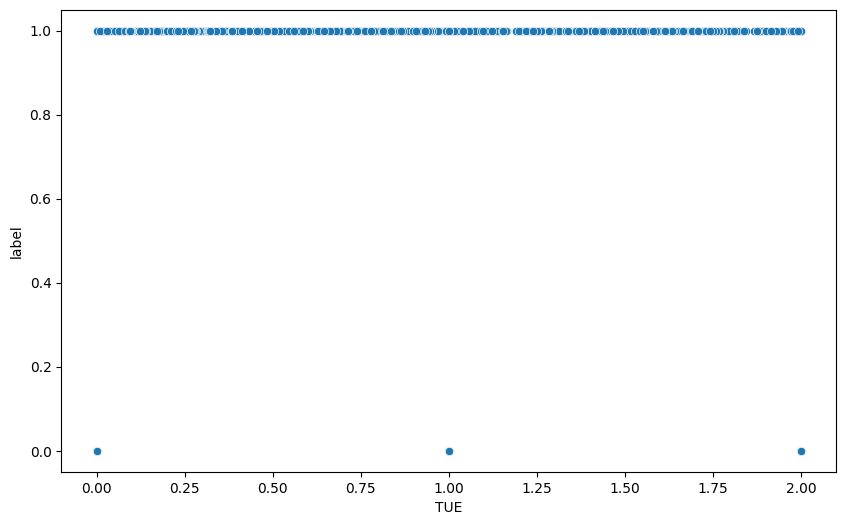

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'TUE', y = 'label', data = data)
plt.show()

The data is largely unbalanced hence calculating the Causal Effect becomes difficult.

Some methods which can be used for such data are:
- Propensinity Score Matching (after oversampling)
- Inverse Probability of Treatment Weighting (IPTW)
- Synthetic Control Method

Note : Linear Regression cannot be used and the label data is categorical in nature.
